In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math
import os

os.environ['KAGGLE_USERNAME'] = '******'
os.environ['KAGGLE_KEY'] = '*******'
import kaggle

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Dataset identifier
dataset = "uciml/default-of-credit-card-clients-dataset"
# Download and unzip
api.dataset_download_files(
    dataset,
    path="/Users/irol/Documents/BITS/Dev/ML3/data",
    unzip=True
)
print("Dataset downloaded and extracted successfully!")

Dataset URL: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
Dataset downloaded and extracted successfully!


In [3]:
df = pd.read_csv("/Users/irol/Documents/BITS/Dev/ml3/data/UCI_Credit_Card.csv")

# Preview
print(df.head())
print(df.shape)

# Target column
# target = 'Diabetes_binary'


X = df.drop("default.payment.next.month", axis=1)
y = df["default.payment.next.month"]

print(y.value_counts(normalize=True))


# Check missing values
missing = df.isnull().sum()

print("Missing values per column:")
print(missing[missing > 0])
print("\nTotal missing values in dataset:", df.isnull().sum().sum())

# if df.isnull().sum().sum() > 0:
#     df = df.fillna(df.median())




   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape)
print(X_test.shape)

(24000, 24)
(6000, 24)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)


(24000, 24) (6000, 24)


In [6]:
import joblib

joblib.dump(scaler, "model/standard_scaler.pkl")

['model/standard_scaler.pkl']

Class Imbalance handling
SMOTE-Synthetic Minority Over-sampling Technique

In [7]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# print("Before SMOTE:" )
# print(y_train.value_counts())
# print("After SMOTE:")
# print(y_train_smote.value_counts())

Logistic Regression

In [8]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import (
#     accuracy_score, precision_score, recall_score,
#     f1_score, roc_auc_score, matthews_corrcoef,
#     confusion_matrix
# )
# import joblib

# def train_logistic_regression(X_train, y_train):
#     model = LogisticRegression(
#         class_weight='balanced',
#         max_iter=1000,
#         random_state=42
#     )
#     model.fit(X_train, y_train)
#     return model

# def evaluate_model(model, X_test, y_test):
#     y_prob = model.predict_proba(X_test)[:, 1]
#     y_pred = (y_prob >= 0.5).astype(int)

#     metrics = {
#         "Accuracy": accuracy_score(y_test, y_pred),
#         "Precision": precision_score(y_test, y_pred),
#         "Recall": recall_score(y_test, y_pred),
#         "F1 Score": f1_score(y_test, y_pred),
#         "ROC-AUC": roc_auc_score(y_test, y_prob),
#         "MCC": matthews_corrcoef(y_test, y_pred)
#     }

#     cm = confusion_matrix(y_test, y_pred)

#     return metrics, cm

In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize model
lr = LogisticRegression(
    class_weight='balanced',   # handle imbalance
    max_iter=5000,
    random_state=42
)

# Train
# lr.fit(X_train_scaled, y_train)

Metrics and CM

In [36]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)
model_metrics = []

def evaluate_classifier(
    model,
    X_test,
    y_test,
    model_name="Model",
    threshold=0.5,
    show_report=True
):
    """
    Evaluates a binary classification model and prints metrics.
    
    Parameters:
    - model: trained sklearn/xgboost model
    - X_test: test features
    - y_test: true labels
    - model_name: name for display
    - threshold: probability threshold (default = 0.5)
    - show_report: whether to print classification report
    
    Returns:
    - metrics_dict
    - confusion_matrix
    """

    # Probability predictions (for ROC-AUC)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Binary predictions
    y_pred = (y_prob >= threshold).astype(int)

    # Metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    cm = confusion_matrix(y_test, y_pred)

    # Printing
    print(f"\n{model_name} Performance")
    print("-" * 50)
    for k, v in metrics.items():
        print(f"{k:<12}: {v:.4f}")

    print("\nConfusion Matrix:")
    print(cm)

    if show_report:
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
    
    plt.figure()
    sns.heatmap(
            cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"]
        )
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return metrics, cm



LR Metric


Logistic Regression Performance
--------------------------------------------------
Accuracy    : 0.6813
Precision   : 0.3691
Recall      : 0.6217
F1 Score    : 0.4632
ROC-AUC     : 0.7085
MCC         : 0.2747

Confusion Matrix:
[[3263 1410]
 [ 502  825]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.77      4673
           1       0.37      0.62      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.68      0.70      6000



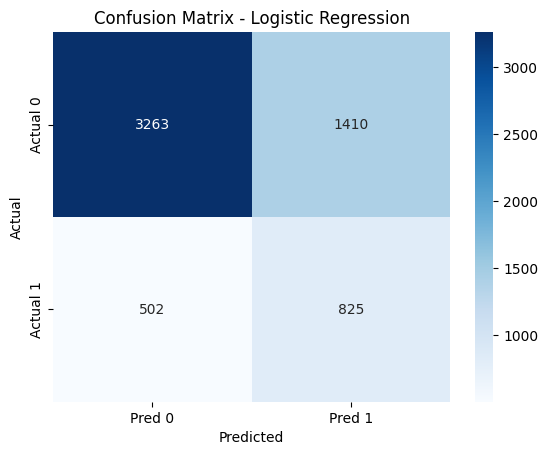

In [37]:
# Train Logistic Regression
lr.fit(X_train_scaled, y_train)

# Evaluate
lr_metrics, lr_cm = evaluate_classifier(
    model=lr,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Logistic Regression"
)
lr_metrics["Model"] = "Logistic Regression"
model_metrics.append(lr_metrics)

Decicision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train):
    """
    Trains a controlled Decision Tree classifier for imbalanced data.
    """
    model = DecisionTreeClassifier(
        class_weight='balanced',
        random_state=42,
        max_depth=6,          # prevents overfitting
        min_samples_leaf=50   # stabilizes splits
    )
    
    model.fit(X_train, y_train)
    return model





Decision Tree Performance
--------------------------------------------------
Accuracy    : 0.7807
Precision   : 0.5039
Recall      : 0.5418
F1 Score    : 0.5221
ROC-AUC     : 0.7643
MCC         : 0.3805

Confusion Matrix:
[[3965  708]
 [ 608  719]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4673
           1       0.50      0.54      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



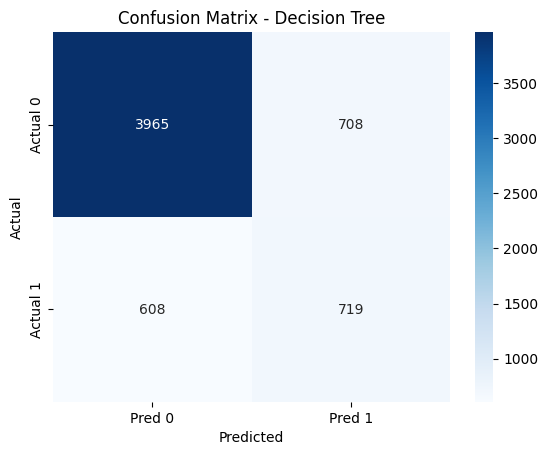

In [39]:

dt = train_decision_tree(X_train, y_train)

dt_metrics, dt_cm = evaluate_classifier(
    model=dt,
    X_test=X_test,
    y_test=y_test,
    model_name="Decision Tree"
)
dt_metrics["Model"] = "Decision Tree"
model_metrics.append(dt_metrics)

    KNN 

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, n_neighbors=15):
    """
    Trains a KNN classifier on scaled data.
    """
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights='distance',   # helps with imbalance
        metric='minkowski'
    )
    
    model.fit(X_train, y_train)
    return model


K-Nearest Neighbors Performance
--------------------------------------------------
Accuracy    : 0.8092
Precision   : 0.6304
Recall      : 0.3316
F1 Score    : 0.4346
ROC-AUC     : 0.7290
MCC         : 0.3577

Confusion Matrix:
[[4415  258]
 [ 887  440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.89      4673
           1       0.63      0.33      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.73      0.64      0.66      6000
weighted avg       0.79      0.81      0.79      6000



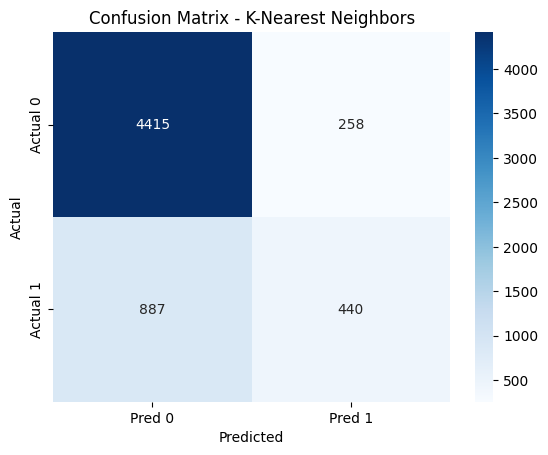

In [41]:
knn = train_knn(X_train_scaled, y_train)

knn_metrics, knn_cm = evaluate_classifier(
    model=knn,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="K-Nearest Neighbors"
)
knn_metrics["Model"] = "K-Nearest Neighbors"

model_metrics.append(knn_metrics)


Guassian Naive bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

def train_naive_bayes(X_train, y_train):
    """
    Trains a Gaussian Naive Bayes classifier.
    """
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model


Naive Bayes Performance
--------------------------------------------------
Accuracy    : 0.7523
Precision   : 0.4513
Recall      : 0.5554
F1 Score    : 0.4980
ROC-AUC     : 0.7251
MCC         : 0.3391

Confusion Matrix:
[[3777  896]
 [ 590  737]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4673
           1       0.45      0.56      0.50      1327

    accuracy                           0.75      6000
   macro avg       0.66      0.68      0.67      6000
weighted avg       0.77      0.75      0.76      6000



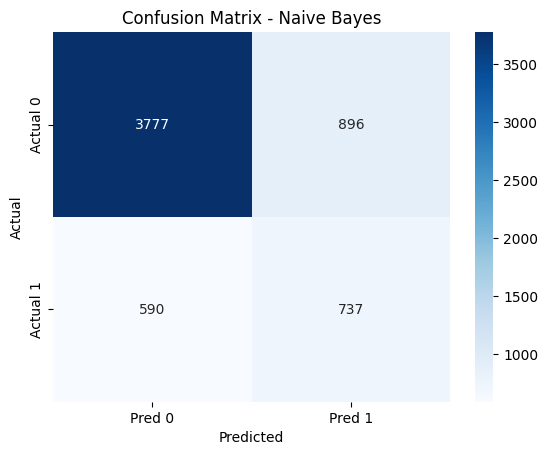

In [43]:
nb = train_naive_bayes(X_train_scaled, y_train)

nb_metrics, nb_cm = evaluate_classifier(
    model=nb,
    X_test=X_test_scaled,
    y_test=y_test,
    model_name="Naive Bayes"
)
nb_metrics["Model"] = "Naive Bayes"

model_metrics.append(nb_metrics)

RF

In [44]:
def train_random_forest(X_train, y_train):
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    return rf


Random Forest Performance
--------------------------------------------------
Accuracy    : 0.7908
Precision   : 0.5252
Recall      : 0.5644
F1 Score    : 0.5441
ROC-AUC     : 0.7758
MCC         : 0.4091

Confusion Matrix:
[[3996  677]
 [ 578  749]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.53      0.56      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.80      0.79      0.79      6000



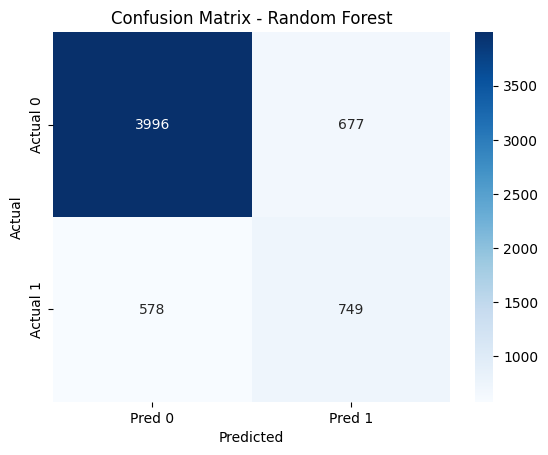

In [45]:
randomforest=train_random_forest(X_train, y_train)

rf_metrics, rf_cm = evaluate_classifier(
    model=randomforest,
    X_test=X_test,
    y_test=y_test,
    model_name="Random Forest"
)
rf_metrics["Model"] = "Random Forest"

model_metrics.append(rf_metrics)


XGBoost

In [46]:
def train_xgboost(X_train, y_train):
    import xgboost as xgb

    scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

    xgb_model = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        n_jobs=-1
    )

    xgb_model.fit(X_train, y_train)
    return xgb_model


XGBoost Performance
--------------------------------------------------
Accuracy    : 0.7653
Precision   : 0.4761
Recall      : 0.6089
F1 Score    : 0.5344
ROC-AUC     : 0.7765
MCC         : 0.3858

Confusion Matrix:
[[3784  889]
 [ 519  808]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4673
           1       0.48      0.61      0.53      1327

    accuracy                           0.77      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.77      0.77      6000



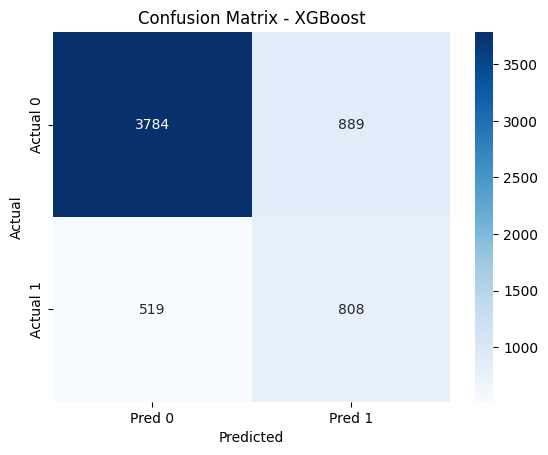

xgb_metrics {'Accuracy': 0.7653333333333333, 'Precision': 0.4761343547436653, 'Recall': 0.6088922381311228, 'F1 Score': 0.5343915343915344, 'ROC-AUC': 0.7764513581605501, 'MCC': 0.3857965081886618, 'Model': 'XGBoost'}


In [47]:
xgb_model = train_xgboost(X_train, y_train)

xgb_metrics, xgb_cm = evaluate_classifier(
    model=xgb_model,
    X_test=X_test,
    y_test=y_test,
    model_name="XGBoost"
)
xgb_metrics["Model"] = "XGBoost"
print('xgb_metrics',xgb_metrics)
model_metrics.append(xgb_metrics)

save models

In [48]:
import os
import joblib

os.makedirs("model", exist_ok=True)
joblib.dump(lr, "model/logistic_regression.pkl")
joblib.dump(dt, "model/decision_tree.pkl")
joblib.dump(knn, "model/knn.pkl")
joblib.dump(nb, "model/naive_bayes.pkl")
joblib.dump(randomforest, "model/random_forest.pkl")
joblib.dump(xgb_model, "model/xgboost.pkl")

print("All models saved successfully!")

All models saved successfully!


In [50]:
headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "MCC"]

rows = [
    [
        m["Model"],
        m["Accuracy"],
        m["Precision"],
        m["Recall"],
        m["F1 Score"],
        m["ROC-AUC"],
        m["MCC"],
    ]
    for m in model_metrics
]

print(tabulate(rows, headers=headers, tablefmt="github", floatfmt=".4f"))

| Model               |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |    MCC |
|---------------------|------------|-------------|----------|------------|-----------|--------|
| Logistic Regression |     0.6813 |      0.3691 |   0.6217 |     0.4632 |    0.7085 | 0.2747 |
| Decision Tree       |     0.7807 |      0.5039 |   0.5418 |     0.5221 |    0.7643 | 0.3805 |
| K-Nearest Neighbors |     0.8092 |      0.6304 |   0.3316 |     0.4346 |    0.7290 | 0.3577 |
| Naive Bayes         |     0.7523 |      0.4513 |   0.5554 |     0.4980 |    0.7251 | 0.3391 |
| Random Forest       |     0.7908 |      0.5252 |   0.5644 |     0.5441 |    0.7758 | 0.4091 |
| XGBoost             |     0.7653 |      0.4761 |   0.6089 |     0.5344 |    0.7765 | 0.3858 |
